In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

path = 'movie_list.tsv'

df = pd.read_csv(path,sep= '\t', names=column_names)

df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [2]:
movie_titles = pd.read_csv('movie_id_titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [5]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [6]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

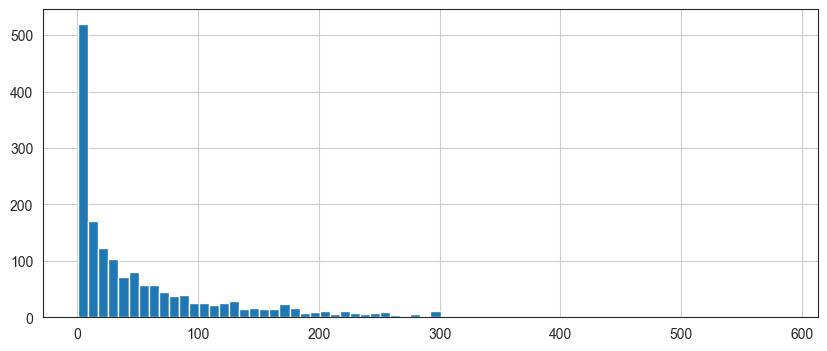

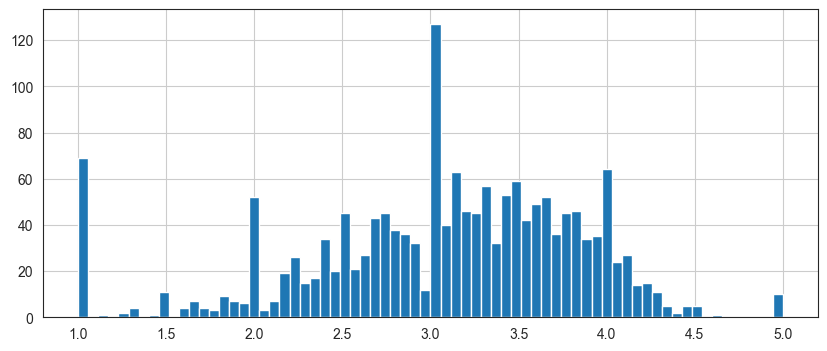

In [ ]:
sns.set_style('white')
%matplotlib inline

plt.figure(figsize= (10, 4))
ratings['num of ratings'].hist(bins=70)

plt.figure(figsize= (10, 4))
ratings['rating'].hist(bins=70)

In [10]:
movie_matrix = data.pivot_table(index= 'user_id', columns= 'title', values= 'rating')
movie_matrix.head()
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
search_user_ratings = movie_matrix['Star Wars (1977)']

similar_search = movie_matrix.corrwith(search_user_ratings)
corrsearch = pd.DataFrame(similar_search, columns= ['Correlation'])
corrsearch.dropna(inplace=True)

corrsearch.head()

C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divid

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [14]:
corrsearch.sort_values('Correlation', ascending=False).head(10)
corrsearch = corrsearch.join(ratings['num of ratings'])
corrsearch.head()
corrsearch[corrsearch['num of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [18]:
movie_input = input("Enter Movie Title: ")

search_user_ratings = movie_matrix[movie_input]

similar_search = movie_matrix.corrwith(search_user_ratings)
corrsearch = pd.DataFrame(similar_search, columns= ['Correlation'])
corrsearch.dropna(inplace=True)

corrsearch.head()

corrsearch.sort_values('Correlation', ascending=False).head(10)
corrsearch = corrsearch.join(ratings['num of ratings'])
corrsearch.head()
corrsearch[corrsearch['num of ratings']>100].sort_values('Correlation', ascending=False).head()

C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\timmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divid

,Correlation,num of ratings
title,,
"Mask, The (1994)",1.000000,129
As Good As It Gets (1997),0.618215,112
"Hunchback of Notre Dame, The (1996)",0.568289,127
Volcano (1997),0.566850,219
Tomorrow Never Dies (1997),0.566073,180
